# 與pandas交互

### 對單元格進行操作

In [ ]:
將dataframe的值插入單元格。

In [1]:
import xlwings as xw
import pandas as pd
wb = xw.Book(r"C:\Users\11004076\Documents\Python Scripts\4_Automation\Book1.xlsx")
sht2 = wb.sheets[2]
df_1 = pd.DataFrame([[1, 2, 3],[4, 5, 6]], columns=['col1','col2','col3'], index=['a','b'])
sht2.range("A1").value = df_1

In [2]:
df_1

,col1,col2,col3
a,1,2,3
b,4,5,6


In [ ]:
將單元格的值轉化為DataFrame

In [10]:
import xlwings as xw
import pandas as pd
wb = xw.Book(r"C:\Users\11004076\Documents\Python Scripts\4_Automation\Book1.xlsx")
sht2 = wb.sheets[2]
df_1 = pd.DataFrame(sht2.range("A1:D2").value)

In [11]:
df_1

,0,1,2,3
0,None,col1,col2,col3
1,a,1,2,3


### 利用pandas繪圖
但只是把繪出來的圖貼到excel

<Picture 'MyPlot' in <Sheet [Book1.xlsx]Sheet>>

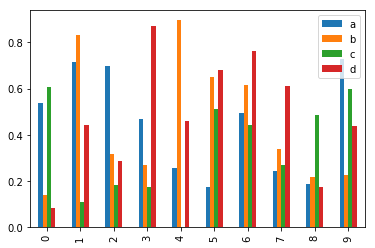

In [9]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
ax = df.plot(kind='bar')
fig = ax.get_figure()

wb.sheets[3].pictures.add(fig, name='MyPlot', update=True,
                  left=wb.sheets[3].range('B5').left, top=wb.sheets[3].range('B5').top)

# 與matplotlib交互
matplotlib作圖與平時一樣，使用add函數加進excel中就好。left和top設置下位置。

<Picture 'MyPlot' in <Sheet [Book1.xlsx]Sheet2>>

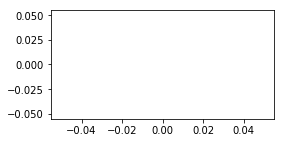

In [12]:
import xlwings as xw
import matplotlib.pyplot as plt

wb_1 = xw.Book(r"C:\Users\11004076\Documents\Python Scripts\4_Automation\Book1.xlsx")  #读取excel
array1 = wb_1.sheets[1].range("A2:A99").value          #图中x的值
array2 = wb_1.sheets[1].range("B2:B99").value          #图中y的值
plt.rcParams['figure.figsize'] = (4.0, 2.0)           #设置图的大小
fig = plt.figure()
plt.plot(array1,array2, 'o-', color = 'blue', label = 'array1')       # label设置标签,'o-'代表线型                                                           

#使用add函数添加图片。matplotlib图片的设置和常规作图一模一样。name为图片名称,left,top设置位置
wb_1.sheets[1].pictures.add(fig, name='MyPlot', update=True,
                  left=wb_1.sheets[1].range('B5').left, top=wb_1.sheets[1].range('B5').top)